<center>
    <img src="https://img.evbuc.com/https%3A%2F%2Fcdn.evbuc.com%2Fimages%2F53691183%2F257316737287%2F1%2Foriginal.jpg?w=800&auto=compress&rect=0%2C0%2C2160%2C1080&s=74711a2a8c51eb0f3bd59e5d482fdc07" width="50%">
</center>

----------

<h1 align="center"> Data Collection </h1>
<br>
<center align="left"> <font size='4'>  Developed by: </font> <img src="https://s3.amazonaws.com/weclouddata/images/logos/wcd_logo.png" width="20%">
</center>
<br>
<center align="left"> <font size='4' color='#FF5713'> Accelerating your data science career! </font></center>
<br>

---------

### In this exercise, we will learn how to achieve some simple web scraping tasks:
1. Use the `requests` library to retrieve data science jobs from indeed.com
2. Use beautifulsoup to parse the HTML results and extract company info
3. Calculate the number of DS related jobs each company is hiring for

In [1]:
# imports

from bs4 import BeautifulSoup # For HTML parsing
import requests # Website connections
from time import sleep # To prevent overwhelming the server between connections
from collections import Counter # Keep track of our term counts
import pandas as pd # For converting results to a dataframe and bar chart plots
import json # For parsing json
%matplotlib inline

### Documentation links

- requests:
http://docs.python-requests.org/en/master/user/quickstart/

- beautifulsoup:
https://www.crummy.com/software/BeautifulSoup/bs4/doc/

# $\Delta$ Getting a Page

We're going to be using the `requests` library to make a request to Indeed and get the page contents. We can then use Beautifulsoup to parse the returned html.

### Making a request

In [2]:
page_url = 'https://ca.indeed.com/jobs?q=machine+learning&l=toronto,+ON'

In [3]:
result = requests.get(page_url)

### Request Status

In [4]:
result.status_code

200

### Get the page headers

In [5]:
result.headers

{'Server': 'nginx', 'Date': 'Sat, 29 Dec 2018 17:01:43 GMT', 'Content-Type': 'text/html;charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'X-Frame-Options': 'SAMEORIGIN', 'Content-Security-Policy': "block-all-mixed-content; object-src 'none'; form-action 'self' *.indeed.com  https://indeedapply.indeedusercontent.com/callback/; frame-src 'self' *.indeed.com  https://www.google.com/recaptcha/ https://indeedapply.indeedusercontent.com/callback/; default-src 'self' 'unsafe-inline' data: *.indeed.com   d26f2q6o1ir0mj.cloudfront.net d3keo50hbbbkoq.cloudfront.net d2q79iu7y748jz.cloudfront.net d3s4xzh46vzktb.cloudfront.net d1ymdoy4af119w.cloudfront.net d3fw5vlhllyvee.cloudfront.net www.google-analytics.com https://www.facebook.com/tr/ https://sb.scorecardresearch.com https://connect.facebook.net https://ad.doubleclick.net/ddm/ *.serving-sys.com https://www.google.com/recaptcha/ https://www.gstatic.com/recaptcha/ chart.apis.google.com https://pp.d2-apps.net/v1/impressi

### Get the page content

In [6]:
result.content

b'<!DOCTYPE html>\n<html lang="en" dir="ltr">\n<head>\n<meta http-equiv="content-type" content="text/html;charset=UTF-8">\n<script type="text/javascript" src="/s/635694a/en_CA.js"></script>\n<link href="/s/970d98c/jobsearch_all.css" rel="stylesheet" type="text/css">\n<link rel="alternate" type="application/rss+xml" title="Machine Learning Jobs in Toronto, ON" href="http://ca.indeed.com/rss?q=machine+learning&l=toronto%2C+ON">\n<link rel="alternate" media="only screen and (max-width: 640px)" href="/m/jobs?q=machine+learning&l=toronto%2C+ON">\n<link rel="alternate" media="handheld" href="/m/jobs?q=machine+learning&l=toronto%2C+ON">\n<script type="text/javascript">\n    \n    if (typeof window[\'closureReadyCallbacks\'] == \'undefined\') {\n        window[\'closureReadyCallbacks\'] = [];\n    }\n\n    function call_when_jsall_loaded(cb) {\n        if (window[\'closureReady\']) {\n            cb();\n        } else {\n            window[\'closureReadyCallbacks\'].push(cb);\n        }\n    }

### Make a Beautiful soup object to parse the contents

In [7]:
soup = BeautifulSoup(result.content, 'lxml')

soup

<!DOCTYPE html>
<html dir="ltr" lang="en">
<head>
<meta content="text/html;charset=utf-8" http-equiv="content-type"/>
<script src="/s/635694a/en_CA.js" type="text/javascript"></script>
<link href="/s/970d98c/jobsearch_all.css" rel="stylesheet" type="text/css"/>
<link href="http://ca.indeed.com/rss?q=machine+learning&amp;l=toronto%2C+ON" rel="alternate" title="Machine Learning Jobs in Toronto, ON" type="application/rss+xml"/>
<link href="/m/jobs?q=machine+learning&amp;l=toronto%2C+ON" media="only screen and (max-width: 640px)" rel="alternate"/>
<link href="/m/jobs?q=machine+learning&amp;l=toronto%2C+ON" media="handheld" rel="alternate"/>
<script type="text/javascript">
    
    if (typeof window['closureReadyCallbacks'] == 'undefined') {
        window['closureReadyCallbacks'] = [];
    }

    function call_when_jsall_loaded(cb) {
        if (window['closureReady']) {
            cb();
        } else {
            window['closureReadyCallbacks'].push(cb);
        }
    }
</script>
<meta

## $\Omega$ Exercise

- Write a function called `get_page` that takes `job_title`, `city`, and `province` as parameters
- Build the url with these parameters
- Make a request to the url
- Convert it to a soup object
- Return the soup object

In [8]:
def get_page(job_title, city, province):
    url = f'http://ca.indeed.com/jobs?q={job_title}&l={city}%2C+{province}'
    result = requests.get(page_url)
    soup = BeautifulSoup(result.content, 'lxml')
    return soup

In [9]:
get_page('accountant', 'toronto', 'ON')

<!DOCTYPE html>
<html dir="ltr" lang="en">
<head>
<meta content="text/html;charset=utf-8" http-equiv="content-type"/>
<script src="/s/635694a/en_CA.js" type="text/javascript"></script>
<link href="/s/970d98c/jobsearch_all.css" rel="stylesheet" type="text/css"/>
<link href="http://ca.indeed.com/rss?q=machine+learning&amp;l=toronto%2C+ON" rel="alternate" title="Machine Learning Jobs in Toronto, ON" type="application/rss+xml"/>
<link href="/m/jobs?q=machine+learning&amp;l=toronto%2C+ON" media="only screen and (max-width: 640px)" rel="alternate"/>
<link href="/m/jobs?q=machine+learning&amp;l=toronto%2C+ON" media="handheld" rel="alternate"/>
<script type="text/javascript">
    
    if (typeof window['closureReadyCallbacks'] == 'undefined') {
        window['closureReadyCallbacks'] = [];
    }

    function call_when_jsall_loaded(cb) {
        if (window['closureReady']) {
            cb();
        } else {
            window['closureReadyCallbacks'].push(cb);
        }
    }
</script>
<meta

# $\Delta$ Parsing html with Beautifulsoup

In [10]:
soup = get_page('data+scientist', 'toronto', 'ON')

### Selecting html tags

In [11]:
soup.find('span', class_='company')

<span class="company">
        Indeed Prime</span>

In [12]:
soup.find(class_='company').get_text(strip=True)

'Indeed Prime'

In [13]:
soup.find(class_='company').get_text()

'\n        Indeed Prime'

## $\Omega$ Exercise

- Get the total number of jobs as an integer

In [14]:
int(soup.find(id='searchCount').get_text(strip=True).split()[3])

979

### Selecting nested tags

In [15]:
for tag in soup.find_all('img'):
    print(tag)


<img alt="Mondelez International" src="https://d2q79iu7y748jz.cloudfront.net/s/_logo/285c0059e98c3a9c090d1a58071192c0.png" width="120"/>
<img id="univsrch-salary-stats-logo" src="/images/univsrch/icon_question_mark_grey.png" style="width:15px;"/>
<img height="1" src="https://www.facebook.com/tr?id=579216298929618&amp;ev=PageView&amp;noscript=1" style="display:none" width="1"/>
<img alt="" height="0" src="https://sb.scorecardresearch.com/p?c1=2&amp;c2=6486505&amp;c4=ca.indeed.com%2Fmachine-learning-jobs-in-toronto%2C-ON&amp;c15=1cvtek5r441t3800&amp;cv=2.0&amp;cj=1" style="display:none" width="0"/>


In [16]:
soup.find(class_='femp_logo').a.img.get('src')

'https://d2q79iu7y748jz.cloudfront.net/s/_logo/285c0059e98c3a9c090d1a58071192c0.png'

### Selecting multiple html tags

In [17]:
for x in soup.find_all(class_='company'):
    print(x.text.strip())

Indeed Prime
Mondelez International
Sheridan College
Samco Machinery
Element AI
Rubikloud Technologies
RBC
Amazon.com
Uppercase
WestRock
PVUOSO LTD.
Ernst & Young OM
tealbook
TAL Group
Mondelez International
Loblaw Digital


In [18]:
[x.text.strip() for x in soup.find_all(class_='company')]

['Indeed Prime',
 'Mondelez International',
 'Sheridan College',
 'Samco Machinery',
 'Element AI',
 'Rubikloud Technologies',
 'RBC',
 'Amazon.com',
 'Uppercase',
 'WestRock',
 'PVUOSO LTD.',
 'Ernst & Young OM',
 'tealbook',
 'TAL Group',
 'Mondelez International',
 'Loblaw Digital']

## $\Omega$ Exercise

- Get all job titles on the page

In [19]:
soup.find(class_='jobtitle').get_text()

'Machine Learning Engineer'

In [20]:
for tag in soup.find_all(class_='jobtitle'):
    print(tag.get_text())

Machine Learning Engineer
Packaging Machine Operator
Professor, Intelligent Agents/Applied Computing/Machine Lear...
Machine Builder

Research Scientist - Machine Learning


Machine Learning Engineer Intern


Machine Learning Engineer


Data Scientist- Machine Learning


Machine Learning Engineer


Production workers (Machine Operators)


Machine learning engineer


Research Scientist, Machine Learning and Cognitive Intellige...


Entry Level Job - "The Healer"


Machine Learning Engineer

Machine Operator
Machine Learning Engineer


In [21]:
soup.find_all(class_='jobtitle')[0]

<a class="jobtitle turnstileLink" data-tn-element="jobTitle" href="/pagead/clk?mo=r&amp;ad=-6NYlbfkN0DhVAxkc_TxySVbUOs6bxWYWOfhmDTNcVTjFFBAY1FXZ9fPQPBH5rmPMvTA7rrKbYAy_liONA3etUeb0BVi0IxB64K00YX5dUMBYyw6givY4ZK116UZ7asjm9s5gqMrKAVVSziZTry54561CXlfTfi585ZkpuysZQkpHm4UR5ZKHZS-WOCkonPB6I5li2BJPPZgQeJhhGHoucvA5XD8yYIC5GXWxOov7RrL54ESmAm29z3T1YCHmrWQXqq2E87BmCS5pPcVL6p01_6Q2OVGeVtmtrBQFQJvaLm9-Mj6qL5bLXBFhEZ8U8ue3F7H8W4Jisi4NrCXZwWvQFQZR8Nrp3mNEoakjXRaNH2dHh0_hO0YnL1ch-763MkHxRPfrMpN_AAY9p3fIRYPcrySQtwMeRQdRIJqpjI1u2t4oM1uTwJ_vWYHjdSYZPk4JfBcMEIRpjB3QnfNWwqblyauXMPbu2Jnm0_0sVdHq2CXd8gF7FK3DA8uZoptlHcwBZTqjGp5kPOVksCe4tSi49fCs2m0M1AbkczRu3LJ84CpSNvlWoBOOjo1hlk8eGHZsgU6Uqndmar3HQgrHz_6upV3uHUUG1yUg86jprjTiePGjRO_qAz6ywjTXR6bjyh0&amp;vjs=3&amp;p=1&amp;sk=&amp;fvj=0" id="sja1" onclick="setRefineByCookie([]); sjoc('sja1',0); convCtr('SJ')" onmousedown="sjomd('sja1'); clk('sja1');" rel="noopener nofollow" target="_blank" title="Machine Learning Engineer"><b>Machine</b> <b>Learning</b> Engineer</a

# $\Delta$ Scraping Multiple Pages

In [22]:
result = requests.get('https://ca.indeed.com/jobs?q=data+scientist&l=toronto%2C+ontario&start=10')
soup = BeautifulSoup(result.content, 'lxml')
soup.find(id='searchCount').get_text(strip=True)

'Page 2 of 403 jobs'

## $\Omega$ Exercise

- Update the `get_page` function so it also takes `page` as a parameter
- Update the url with `page` so it coresponds to right number, ex.
    - page 1 => 0
    - page 2 => 10
    - page 3 => 20
    - etc.

In [23]:
def get_page(job_title, city, province, page):
    page_num = (page * 10) - 10
    url = f'http://ca.indeed.com/jobs?q={job_title}&l={city}%2C+{province}&start={page_num}'
    result = requests.get(url)
    soup = BeautifulSoup(result.content, 'lxml')
    return soup

In [24]:
get_page('data+scientist', 'toronto', 'ON', 5).find(id='searchCount').get_text(strip=True)

'Page 5 of 403 jobs'

### Get the company names from the first 3 pages

In [25]:
companies = []
for page in range(1, 4):
    print(page)
    soup = get_page('data+scientist', 'toronto', 'ON', page)
    companies += [x.text.strip() for x in soup.find_all(class_='company')]
    
companies

1
2
3


['Loblaw Digital',
 'Indeed Prime',
 'Boxy Charm',
 'Loblaw Digital',
 'TD Bank',
 'RBC',
 'FOUND PEOPLE INC.',
 'PUSH',
 'Corl',
 'KPMG LLP',
 'Amazon.com',
 'HSBC',
 'Overbond',
 'Canvass Analytics Inc.',
 'Shopify',
 'BrainStation',
 'Indeed Prime',
 'BrainStation',
 'Loblaw Digital',
 'Boxy Charm',
 'Munich Re',
 'Schulich School of Business, York University',
 'Maple Leaf Sports & Entertainment',
 'Loblaw Digital',
 'Crescendo Technology',
 'GALE Partners',
 'Quartic.ai',
 'Capital One',
 'Goldspot Discoveries Inc.',
 'Anova Ltd.',
 'LoyaltyOne',
 'Shopify',
 'Loblaw Digital',
 'BrainStation',
 'Boxy Charm',
 'LoyaltyOne',
 'Loblaw Digital',
 'Aviva',
 'Canadian Tire Corporation',
 'LMC Diabetes & Endocrinology',
 'FOUND PEOPLE INC.',
 'Amazon.com',
 'Deloitte',
 "Ontario Teachers' Pension Plan",
 'Quartic.ai',
 'BrainStation',
 'BOXY CHARM',
 'Shopify',
 'Indeed Prime',
 'Loblaw Digital']

In [26]:
from collections import Counter

Counter(companies).most_common()

[('Loblaw Digital', 7),
 ('BrainStation', 4),
 ('Indeed Prime', 3),
 ('Boxy Charm', 3),
 ('Shopify', 3),
 ('FOUND PEOPLE INC.', 2),
 ('Amazon.com', 2),
 ('Quartic.ai', 2),
 ('LoyaltyOne', 2),
 ('TD Bank', 1),
 ('RBC', 1),
 ('PUSH', 1),
 ('Corl', 1),
 ('KPMG LLP', 1),
 ('HSBC', 1),
 ('Overbond', 1),
 ('Canvass Analytics Inc.', 1),
 ('Munich Re', 1),
 ('Schulich School of Business, York University', 1),
 ('Maple Leaf Sports & Entertainment', 1),
 ('Crescendo Technology', 1),
 ('GALE Partners', 1),
 ('Capital One', 1),
 ('Goldspot Discoveries Inc.', 1),
 ('Anova Ltd.', 1),
 ('Aviva', 1),
 ('Canadian Tire Corporation', 1),
 ('LMC Diabetes & Endocrinology', 1),
 ('Deloitte', 1),
 ("Ontario Teachers' Pension Plan", 1),
 ('BOXY CHARM', 1)]

## $\Omega$ Exercise

- Get all the companies from all the pages (hint: use the page number)
- Get the top 10 companies by frequency

In [27]:
soup = get_page('data+scientist', 'toronto', 'ON', 1)
num_jobs = int(soup.find(id='searchCount').get_text(strip=True).split()[3])
num_jobs

403

In [28]:
num_pages = num_jobs // 10
num_pages

40

In [29]:
companies = []
for page in range(1, num_pages + 1):
    print(page)
    soup = get_page('data+scientist', 'toronto', 'ON', page)
    companies += [x.text.strip() for x in soup.find_all(class_='company')]
    
companies

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


['Loblaw Digital',
 'Indeed Prime',
 'Boxy Charm',
 'Loblaw Digital',
 'TD Bank',
 'RBC',
 'FOUND PEOPLE INC.',
 'PUSH',
 'Corl',
 'KPMG LLP',
 'Amazon.com',
 'HSBC',
 'Overbond',
 'Canvass Analytics Inc.',
 'Shopify',
 'BrainStation',
 'Indeed Prime',
 'BrainStation',
 'Loblaw Digital',
 'Boxy Charm',
 'Munich Re',
 'Schulich School of Business, York University',
 'Maple Leaf Sports & Entertainment',
 'Loblaw Digital',
 'Crescendo Technology',
 'GALE Partners',
 'Quartic.ai',
 'Capital One',
 'Goldspot Discoveries Inc.',
 'Anova Ltd.',
 'LoyaltyOne',
 'Shopify',
 'Loblaw Digital',
 'BrainStation',
 'Boxy Charm',
 'LoyaltyOne',
 'Loblaw Digital',
 'Aviva',
 'Canadian Tire Corporation',
 'LMC Diabetes & Endocrinology',
 'FOUND PEOPLE INC.',
 'Amazon.com',
 'Deloitte',
 "Ontario Teachers' Pension Plan",
 'Quartic.ai',
 'BrainStation',
 'BOXY CHARM',
 'Shopify',
 'Indeed Prime',
 'Loblaw Digital',
 'Indeed Prime',
 'Boxy Charm',
 'LoyaltyOne',
 'Loblaw Digital',
 'Huawei Canada',
 'Flipp'

In [30]:
companies_top_10 = Counter(companies).most_common(10)
companies_top_10

[('Loblaw Digital', 75),
 ('Shopify', 43),
 ('Boxy Charm', 42),
 ('BrainStation', 40),
 ('Indeed Prime', 39),
 ('LoyaltyOne', 33),
 ('BlueRock Therapeutics', 12),
 ('Aviva', 11),
 ('AB Sciex Pte', 9),
 ('SCIEX', 9)]

In [31]:
import pandas as pd

df = pd.DataFrame(companies_top_10, columns=['company', 'count'])
df

,company,count
0,Loblaw Digital,75
1,Shopify,43
2,Boxy Charm,42
3,BrainStation,40
4,Indeed Prime,39
5,LoyaltyOne,33
6,BlueRock Therapeutics,12
7,Aviva,11
8,AB Sciex Pte,9
9,SCIEX,9


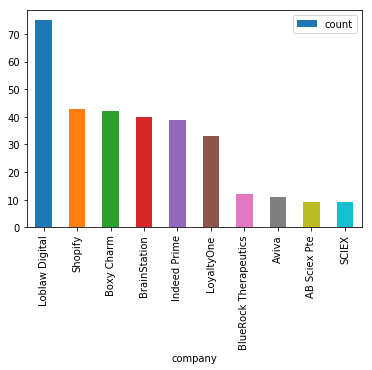

In [32]:
df.plot.bar(x='company', y='count')

# $\Delta$ Getting data from an API

> In computer programming, an application programming interface (API) is a set of subroutine definitions, communication protocols, and tools for building software. In general terms, it is a set of clearly defined methods of communication among various components. A good API makes it easier to develop a computer program by providing all the building blocks, which are then put together by the programmer.

### Movie API

http://www.omdbapi.com/

In [33]:
api_key = '3212d17d'

url = f'http://www.omdbapi.com/?apikey={api_key}&t=titanic'

r = requests.get(url)

In [34]:
r.status_code

200

### Show response text

In [35]:
r.text

'{"Title":"Titanic","Year":"1997","Rated":"PG-13","Released":"19 Dec 1997","Runtime":"194 min","Genre":"Drama, Romance","Director":"James Cameron","Writer":"James Cameron","Actors":"Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates","Plot":"A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.","Language":"English, Swedish","Country":"USA","Awards":"Won 11 Oscars. Another 111 wins & 77 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BMDdmZGU3NDQtY2E5My00ZTliLWIzOTUtMTY4ZGI1YjdiNjk3XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.8/10"},{"Source":"Rotten Tomatoes","Value":"89%"},{"Source":"Metacritic","Value":"75/100"}],"Metascore":"75","imdbRating":"7.8","imdbVotes":"919,766","imdbID":"tt0120338","Type":"movie","DVD":"10 Sep 2012","BoxOffice":"N/A","Production":"Paramount Pictures","Website":"http://www.titanicmovie.com/","Response":"True"}'

### Read json as Python dictionary

In [36]:
movie_data = json.loads(r.text)
movie_data

{'Actors': 'Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates',
 'Awards': 'Won 11 Oscars. Another 111 wins & 77 nominations.',
 'BoxOffice': 'N/A',
 'Country': 'USA',
 'DVD': '10 Sep 2012',
 'Director': 'James Cameron',
 'Genre': 'Drama, Romance',
 'Language': 'English, Swedish',
 'Metascore': '75',
 'Plot': 'A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMDdmZGU3NDQtY2E5My00ZTliLWIzOTUtMTY4ZGI1YjdiNjk3XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg',
 'Production': 'Paramount Pictures',
 'Rated': 'PG-13',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.8/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '89%'},
  {'Source': 'Metacritic', 'Value': '75/100'}],
 'Released': '19 Dec 1997',
 'Response': 'True',
 'Runtime': '194 min',
 'Title': 'Titanic',
 'Type': 'movie',
 'Website': 'http://www.titanicmovie.com/',
 'Writer': 'James Cameron',
 'Yea

In [37]:
movie_data['Plot']

'A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.'

### Multiple string query

In [38]:
url = f'http://www.omdbapi.com/?apikey={api_key}&t=titanic&plot=full'

r = requests.get(url)

In [39]:
movie_data = json.loads(r.text)
movie_data['Plot']

'84 years later, a 100 year-old woman named Rose DeWitt Bukater tells the story to her granddaughter Lizzy Calvert, Brock Lovett, Lewis Bodine, Bobby Buell and Anatoly Mikailavich on the Keldysh about her life set in April 10th 1912, on a ship called Titanic when young Rose boards the departing ship with the upper-class passengers and her mother, Ruth DeWitt Bukater, and her fiancé, Caledon Hockley. Meanwhile, a drifter and artist named Jack Dawson and his best friend Fabrizio De Rossi win third-class tickets to the ship in a game. And she explains the whole story from departure until the death of Titanic on its first and last voyage April 15th, 1912 at 2:20 in the morning.'

## $\Omega$ Exercise

- Try and use the `Search` parameter of the api to get **all** the Titanic movies
- Print the poster image of every movie (**hint:** You can use `Ipython.display` to print images

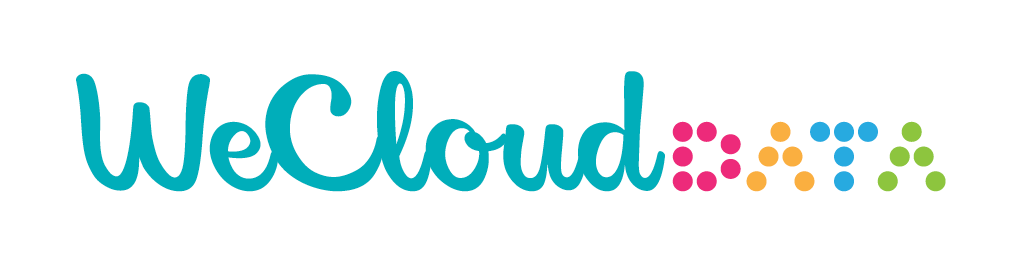

In [40]:
# Display image example

from IPython.display import Image, display

display(Image('https://s3.amazonaws.com/weclouddata/images/logos/wcd_logo.png'))

In [41]:
api_key = '3212d17d'

url = f'http://www.omdbapi.com/?apikey={api_key}&s=titanic'

r = requests.get(url)

movie_data = json.loads(r.text)

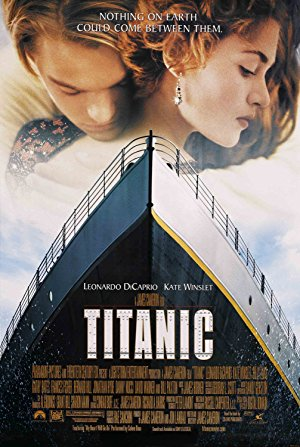

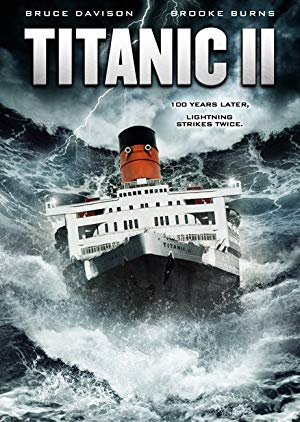

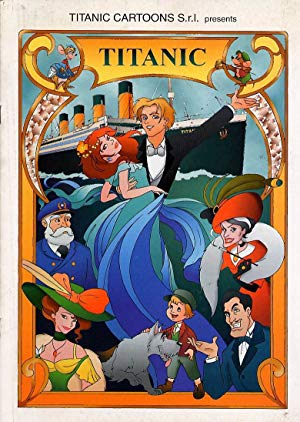

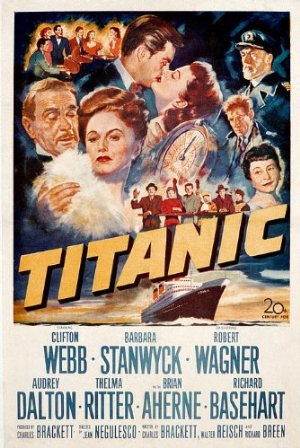

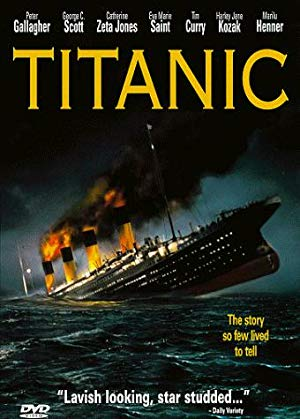

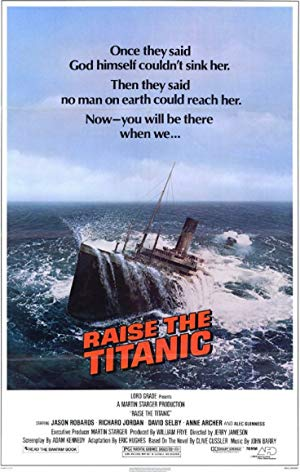

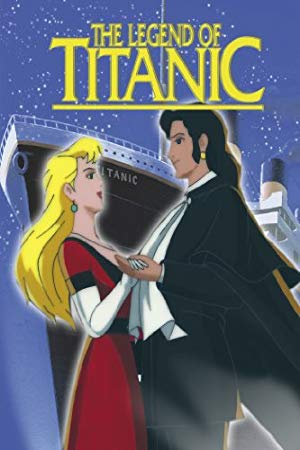

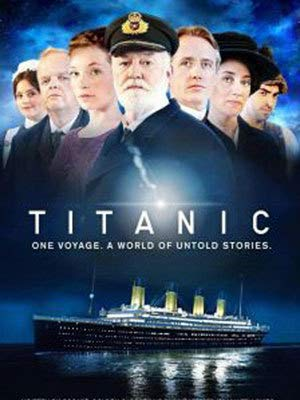

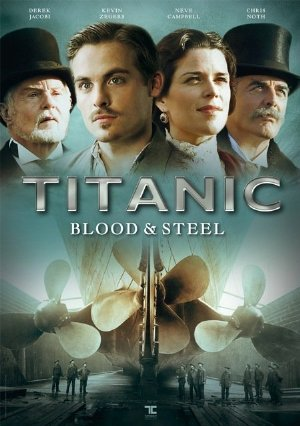

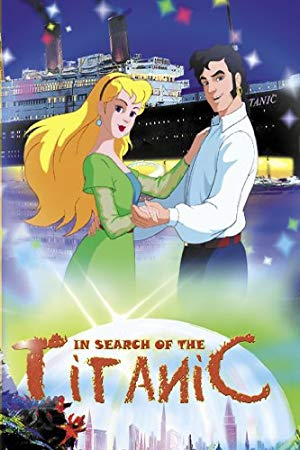

In [42]:
for movie in movie_data['Search']:
    display(Image(movie['Poster']))